In [1]:
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
dfaa = pd.read_excel('./JDdata.xls')

In [3]:
dfaa.head()

,单据类型,单据编号,合同主体,售后退货单号,商品名称,订单号,采购单号,采购员/销售员,sku编号,sku数量,金额,业务日期
0,实销实结销售单,100_180301_180301_34135587,江苏圆周电子商务有限公司,NaN,Java精彩编程200例（全彩版）,72632330245,34135587,魏晓冬/魏晓冬,12185937,-1,46.28,2018-03-01
1,实销实结销售单,100_180301_180301_31496215,江苏圆周电子商务有限公司,NaN,Java项目开发实战入门（全彩版）,72632330245,31496215,魏晓冬/魏晓冬,12163091,-1,29.90,2018-03-01
2,实销实结销售单,100_180301_180301_31496216,江苏圆周电子商务有限公司,NaN,C#项目开发实战入门（全彩版）,71654827800,31496216,魏晓冬/魏晓冬,12163129,-1,40.48,2018-03-01
3,实销实结销售单,100_180301_180301_36575217,江苏圆周电子商务有限公司,NaN,零基础学JavaScript（全彩版 附光盘 小白实战手册）,72630213865,36575217,魏晓冬/魏晓冬,12275164,-2,92.56,2018-03-01
4,实销实结销售单,100_180301_180301_34120856,江苏圆周电子商务有限公司,NaN,零基础学C语言（全彩版 附光盘小白手册）,72638734093,34120856,魏晓冬/魏晓冬,12250414,-1,40.48,2018-03-01


In [4]:
dfaa.shape

(24541, 12)

In [5]:
dfbb = pd.read_excel('./JDcar.xls')

In [6]:
dfbb.head()

,序号,交易类型,投放日期,支出
0,449564744,快车扣费,2018-01-01,359.44
1,449779617,快车扣费,2018-01-02,383.73
2,450089804,快车扣费,2018-01-03,446.93
3,450410610,快车扣费,2018-01-04,368.78
4,450499464,快车扣费,2018-01-05,477.38


In [7]:
dfbb.shape

(181, 4)

In [8]:
df1=dfaa[['业务日期','金额']]
df2=dfbb[['投放日期','支出']]

In [9]:
df1.head()

,业务日期,金额
0,2018-03-01,46.28
1,2018-03-01,29.90
2,2018-03-01,40.48
3,2018-03-01,92.56
4,2018-03-01,40.48


In [10]:
df1['业务日期'].isnull().sum()

0

In [11]:
(df1['金额']==0).sum()

0

In [12]:
df2.head()

,投放日期,支出
0,2018-01-01,359.44
1,2018-01-02,383.73
2,2018-01-03,446.93
3,2018-01-04,368.78
4,2018-01-05,477.38


In [13]:
df2['投放日期'].isnull().sum()

0

In [14]:
(df2['支出']==0).sum()

0

In [15]:
df1=df1[df1['业务日期'].notnull() & df1['金额'] !=0]
df2=df2[df2['投放日期'].notnull() & df2['支出'] !=0]

In [16]:
df1.shape,df2.shape

((24541, 2), (181, 2))

In [17]:
df1['业务日期'] = pd.to_datetime(df1['业务日期'])
df2['投放日期'] = pd.to_datetime(df2['投放日期'])

In [18]:
df1.head()

,业务日期,金额
0,2018-03-01,46.28
1,2018-03-01,29.90
2,2018-03-01,40.48
3,2018-03-01,92.56
4,2018-03-01,40.48


In [19]:
df2.head()

,投放日期,支出
0,2018-01-01,359.44
1,2018-01-02,383.73
2,2018-01-03,446.93
3,2018-01-04,368.78
4,2018-01-05,477.38


In [20]:
dfData = df1.set_index('业务日期',drop=True)
dfCar = df2.set_index('投放日期',drop=True)

In [21]:
dfData.head()

,金额
业务日期,
2018-03-01,46.28
2018-03-01,29.90
2018-03-01,40.48
2018-03-01,92.56
2018-03-01,40.48


In [22]:
dfCar.head()

,支出
投放日期,
2018-01-01,359.44
2018-01-02,383.73
2018-01-03,446.93
2018-01-04,368.78
2018-01-05,477.38


In [23]:
dfData_month=dfData.resample('M').sum().to_period('M')

In [24]:
dfData_month

,金额
业务日期,
2018-01,5641.40
2018-02,116830.00
2018-03,209818.38
2018-04,194799.94
2018-05,184986.74
2018-06,360338.74


In [25]:
dfCar_month=dfCar.resample('M').sum().to_period('M')

In [26]:
dfCar_month

,支出
投放日期,
2018-01,13985.51
2018-02,6265.78
2018-03,12116.45
2018-04,15832.77
2018-05,18064.53
2018-06,57013.59


In [27]:
LR=linear_model.LinearRegression(fit_intercept=True)

In [28]:
x=pd.DataFrame(dfCar_month['支出'])
y=pd.DataFrame(dfData_month['金额'])

In [29]:
x.shape,y.shape

((6, 1), (6, 1))

In [30]:
LR.fit(x,y) #拟合线性模型
k=LR.coef_ 
b=LR.intercept_

In [31]:
k,b

(array([[4.94487765]]), array([77136.24301541]))

In [32]:
y_pred =LR.predict(x)

In [33]:
y_pred

array([[146292.87880399],
       [108119.75848188],
       [137050.60578806],
       [155427.35348721],
       [166463.1336259 ],
       [359061.46981296]])

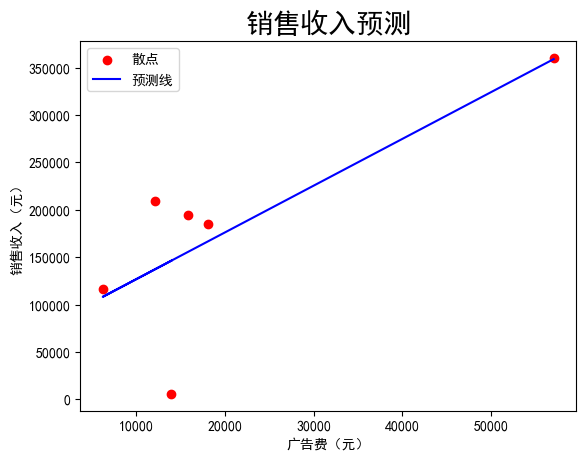

In [34]:
plt.rc('font', family='SimHei', size=10)
plt.figure("销售收入分析")
plt.scatter(x, y,  color='red') #真实值散点图
plt.plot(x,y_pred, color='blue', linewidth=1.5) #预测回归线
plt.ylabel(u'销售收入（元）')
plt.xlabel(u'广告费（元）')
plt.title('销售收入预测',fontsize='20')
plt.legend(labels=['散点','预测线','预测值'])
plt.savefig('huigui.jpg')
plt.show()